In [2]:
import pandas as pd

In [3]:
movies_df = pd.read_csv(r"movies.csv")

In [8]:
print(movies_df.shape)

(9742, 3)


In [4]:
ratings_df = pd.read_csv(r"ratings.csv")

In [11]:
print(ratings_df.shape)

(100836, 4)


In [5]:
tags_df = pd.read_csv(r"tags.csv")

matrix_tags = tags_df[tags_df['movieId'] == 2571]

tags = matrix_tags['tag'].tolist()

print("Tags for 'The Matrix (1999)':")
for tag in tags:
    print(tag)

Tags for 'The Matrix (1999)':
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


In [6]:
grouped_ratings_df = ratings_df.groupby('movieId').agg(
    count=('rating', 'size'),
    mean_rating=('rating', 'mean')
).reset_index()
merged_df = pd.merge(movies_df, grouped_ratings_df, on='movieId', how='inner')

filtered_movies_df = merged_df[merged_df['count'] > 50]

print(filtered_movies_df.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  count  mean_rating  
0  Adventure|Animation|Children|Comedy|Fantasy    215     3.920930  
1                   Adventure|Children|Fantasy    110     3.431818  
2                               Comedy|Romance     52     3.259615  
5                        Action|Crime|Thriller    102     3.946078  
6                               Comedy|Romance     54     3.185185  


In [7]:
most_popular_movie = filtered_movies_df.loc[filtered_movies_df['mean_rating'].idxmax()]
print(most_popular_movie)

movieId                                     318
title          Shawshank Redemption, The (1994)
genres                              Crime|Drama
count                                       317
mean_rating                            4.429022
Name: 277, dtype: object


In [8]:
top_5_movies_df = filtered_movies_df.sort_values(by='count', ascending=False).head(5)
print(top_5_movies_df)

      movieId                             title                       genres  \
314       356               Forrest Gump (1994)     Comedy|Drama|Romance|War   
277       318  Shawshank Redemption, The (1994)                  Crime|Drama   
257       296               Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller   
510       593  Silence of the Lambs, The (1991)        Crime|Horror|Thriller   
1938     2571                Matrix, The (1999)       Action|Sci-Fi|Thriller   

      count  mean_rating  
314     329     4.164134  
277     317     4.429022  
257     307     4.197068  
510     279     4.161290  
1938    278     4.192446  


In [9]:
top_5_movies_df = filtered_movies_df.sort_values(by='count', ascending=False).head(5)

scifi_movies_df = filtered_movies_df[filtered_movies_df['genres'].str.contains('Sci-Fi')]

sorted_sci_fi_df = scifi_movies_df.sort_values(by='count', ascending=False)

third_most_popular_sci_fi = sorted_sci_fi_df.iloc[2]

print(third_most_popular_sci_fi)

movieId                                     480
title                      Jurassic Park (1993)
genres         Action|Adventure|Sci-Fi|Thriller
count                                       238
mean_rating                                3.75
Name: 418, dtype: object


In [10]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', itemprop='ratingValue')
    return imdb_rating.text if imdb_rating else np.nan


links_df = pd.read_csv(r"links.csv")

movies_with_links_df = pd.merge(filtered_movies_df, links_df, on='movieId', how='inner')


ratings = {}
for _, row in movies_with_links_df.iterrows():
    imdb_id = row['imdbId']
    print(f"Scraping rating for IMDB ID: {imdb_id}")
    try:
        rating = scrapper(imdb_id)
        if rating is not None:
            ratings[row['movieId']] = rating
    except Exception as e:
        print(f"Error scraping rating for IMDB ID {imdb_id}: {e}")


if ratings:
    highest_rated_movie_id = max(ratings, key=ratings.get)
    highest_rating = ratings[highest_rated_movie_id]
    print(f"Movie ID with the highest IMDB rating: {highest_rated_movie_id}")
else:
    print("No ratings found.")

Scraping rating for IMDB ID: 114709
Scraping rating for IMDB ID: 113497
Scraping rating for IMDB ID: 113228
Scraping rating for IMDB ID: 113277
Scraping rating for IMDB ID: 114319
Scraping rating for IMDB ID: 113189
Scraping rating for IMDB ID: 112346
Scraping rating for IMDB ID: 112641
Scraping rating for IMDB ID: 114388
Scraping rating for IMDB ID: 112281
Scraping rating for IMDB ID: 113161
Scraping rating for IMDB ID: 113627
Scraping rating for IMDB ID: 114746
Scraping rating for IMDB ID: 112431
Scraping rating for IMDB ID: 112818
Scraping rating for IMDB ID: 112697
Scraping rating for IMDB ID: 114369
Scraping rating for IMDB ID: 114148
Scraping rating for IMDB ID: 114814
Scraping rating for IMDB ID: 113862
Scraping rating for IMDB ID: 116367
Scraping rating for IMDB ID: 115759
Scraping rating for IMDB ID: 116483
Scraping rating for IMDB ID: 112573
Scraping rating for IMDB ID: 75314
Scraping rating for IMDB ID: 115685
Scraping rating for IMDB ID: 112442
Scraping rating for IMDB ID: 

In [18]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', itemprop='ratingValue')
    return imdb_rating.text if imdb_rating else np.nan


links_df = pd.read_csv(r"links.csv")

movies_with_links_df = pd.merge(scifi_movies_df, links_df, on='movieId', how='inner')


ratings = {}
for _, row in movies_with_links_df.iterrows():
    imdb_id = row['imdbId']
    print(f"Scraping rating for IMDB ID: {imdb_id}")
    try:
        rating = scrapper(imdb_id)
        if rating is not None:
            ratings[row['movieId']] = rating
    except Exception as e:
        print(f"Error scraping rating for IMDB ID {imdb_id}: {e}")


if ratings:
    highest_rated_movie_id = max(ratings, key=ratings.get)
    highest_rating = ratings[highest_rated_movie_id]
    print(f"Sci-Fi-Movie ID with the highest IMDB rating: {highest_rated_movie_id}")
else:
    print("No ratings found.")

Scraping rating for IMDB ID: 114746
Scraping rating for IMDB ID: 112715
Scraping rating for IMDB ID: 113481
Scraping rating for IMDB ID: 113492
Scraping rating for IMDB ID: 114898
Scraping rating for IMDB ID: 76759
Scraping rating for IMDB ID: 114069
Scraping rating for IMDB ID: 111282
Scraping rating for IMDB ID: 111280
Scraping rating for IMDB ID: 106598
Scraping rating for IMDB ID: 106697
Scraping rating for IMDB ID: 107290
Scraping rating for IMDB ID: 83658
Scraping rating for IMDB ID: 103064
Scraping rating for IMDB ID: 117705
Scraping rating for IMDB ID: 116629
Scraping rating for IMDB ID: 117218
Scraping rating for IMDB ID: 62622
Scraping rating for IMDB ID: 83866
Scraping rating for IMDB ID: 96754
Scraping rating for IMDB ID: 80684
Scraping rating for IMDB ID: 88846
Scraping rating for IMDB ID: 90605
Scraping rating for IMDB ID: 66921
Scraping rating for IMDB ID: 86190
Scraping rating for IMDB ID: 78748
Scraping rating for IMDB ID: 88247
Scraping rating for IMDB ID: 88763
Scrap

In [12]:
t2_ratings = ratings_df[ratings_df['movieId'] == 589]

average_rating = t2_ratings['rating'].mean()

print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating}")

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


In [13]:
ratings_count = ratings_df.groupby('movieId').size().reset_index(name='ratings_count')

max_ratings_movie = ratings_count.loc[ratings_count['ratings_count'].idxmax()]

print(f"Movie with the maximum number of user ratings: {max_ratings_movie['movieId']}")
print(f"Number of ratings: {max_ratings_movie['ratings_count']}")

Movie with the maximum number of user ratings: 356
Number of ratings: 329


In [14]:
unique_users = ratings_df['userId'].nunique()

print(f"Number of unique userIds: {unique_users}")

Number of unique userIds: 610


Skewness of the distribution: -1.8474937360359363



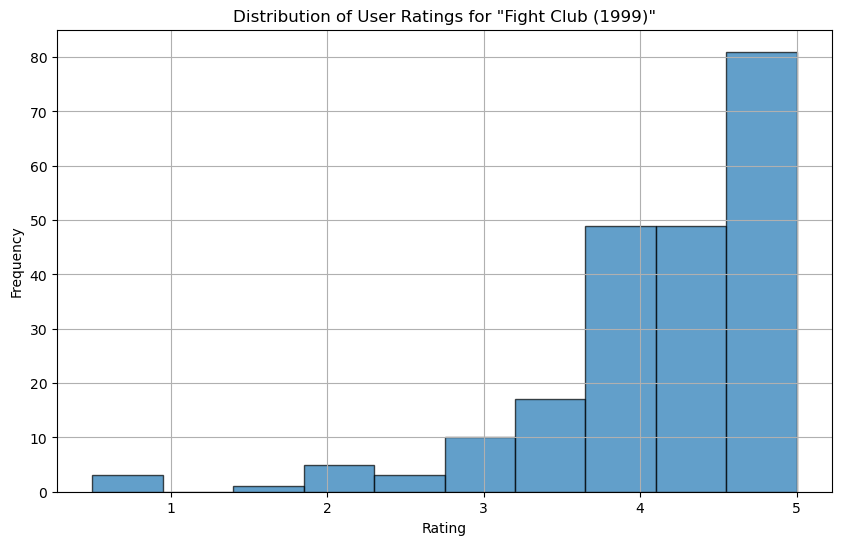

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import skew

fight_club_ratings = ratings_df[ratings_df['movieId'] == 2959]['rating']

skewness_value = skew(fight_club_ratings)
print(f"Skewness of the distribution: {skewness_value}\n")

plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
